# 호텔스닷컴 사용자 리뷰 분석

* 분석 목표 : 감성분석하기 
* 긍정적인 리뷰인지, 부정적인 리뷰인지

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# 출력할 때, 경고 뜨지 않게 하기 위해서 ~ 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/hotel_review_75000.csv', encoding='utf-8')
data

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,0,356,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,1,357,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,2,358,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,3,359,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,4,360,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True
...,...,...,...,...,...,...,...,...,...,...
74995,74995,223914,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 8월 17일,10.0,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...,True
74996,74996,223915,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,2박 로맨틱 여행,2018년 11월 30일,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...,True
74997,74997,223916,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,1박 가족 여행,2019년 12월 4일,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...,True
74998,74998,223917,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),other,1박 여행,2019년 5월 2일,8.0,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...,True


In [4]:
stopwords = pd.read_csv('./data/한국어불용어100.txt')
stopwords

# 나중에 제거해야 할 한글 단어 : nltk 라이브러리로 상투적인 언어(stopwords) 제거하기

,이
0,있
1,하
2,것
3,들
4,그
...,...
103,원
104,잘
105,통하
106,소리


## 데이터 확인하기 

In [5]:
data.info()

# 결측치는 없다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  75000 non-null  int64  
 1   Unnamed: 0    75000 non-null  int64  
 2   hotelId       75000 non-null  int64  
 3   hotelName     75000 non-null  object 
 4   tripType      75000 non-null  object 
 5   tripTypeText  75000 non-null  object 
 6   reviewDate    75000 non-null  object 
 7   rating        75000 non-null  float64
 8   description   75000 non-null  object 
 9   isKorNot      75000 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 5.2+ MB


In [6]:
stopwords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이       108 non-null    object
dtypes: object(1)
memory usage: 992.0+ bytes


In [7]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'hotelId', 'hotelName', 'tripType',
       'tripTypeText', 'reviewDate', 'rating', 'description', 'isKorNot'],
      dtype='object')

In [8]:
data['hotelName'].value_counts()

hotelName
세인트존스 호텔 (St. John's Hotel)                    1170
스카이베이 경포호텔 (Skybay Hotel Gyeongpo)              924
속초 라마다호텔 (Ramada Sokcho Hotel)                  837
썬크루즈 리조트 & 요트 (Sun Cruise Resort and Yacht)     776
롯데리조트속초 (Lotte Resort Sokcho)                   660
                                               ... 
지리산 일성콘도 (Jiri Mountain Ilsung Condo)             1
리츠 플라자 호텔 (Ritz Plaza Hotel)                      1
자작나무 힐링 캠프 (Jajaknamu Healing Camp)               1
남산 포레스트 인 명동 (Namsan Forest in Myeongdong)        1
엠케이 리버티 하우스 (MK LIBERTY HOUSE)                    1
Name: count, Length: 2015, dtype: int64

In [9]:
data['description'].value_counts()

description
만족합니다                                                                                                                                                                                                                                                                                        153
좋아요                                                                                                                                                                                                                                                                                          143
좋았어요                                                                                                                                                                                                                                                                                         122
좋았습니다                                                                                                                    

In [10]:
data['description']

0        직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1        웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2        서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3                                            가격에 맞게 만족했습니다
4        처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
                               ...                        
74995    조식과 스탠더드 하프전망 신청해서  1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...
74996    객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...
74997    배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...
74998    우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...
74999    주차장이 부족해서 다른데에 주차했는데 아침에 이동해달라는 전화가 와서 다소 불쾌했슴...
Name: description, Length: 75000, dtype: object

In [11]:
data[['description']][:10]

,description
0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3,가격에 맞게 만족했습니다
4,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
5,서비스 최고였어요수영장만 말고 사우나도 같이 이용할수있었으면 다만 토요일 오후에 집...
6,최고의 위치 좋은 서비스 관리 잘 된 시설 아주 만족
7,명동 가깝고 이그제큐티브룸 서비스도 좋고 깨끗하고 친절해요
8,위치도 좋았고 룸컨디션이 너무 좋았어요특히 조식부폐는 음식퀄리티가 굉장히 훌륭했어요
9,중심가라 새벽에도 차량소음이 들린다는 점 히터때문에 객실이 좀 건조한 편이라는 점을...


In [12]:
data['description'][0]

'직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비해 약간 부족합니다'

In [13]:
data['description'][1]

'웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두 인상적이었습니다'

In [14]:
data['description'][5]

'서비스 최고였어요수영장만 말고 사우나도 같이 이용할수있었으면 다만 토요일 오후에 집회 때문에 주변이 혼잡하더라구요'

In [15]:
data.iloc[5]['description']

'서비스 최고였어요수영장만 말고 사우나도 같이 이용할수있었으면 다만 토요일 오후에 집회 때문에 주변이 혼잡하더라구요'

In [16]:
data.head(3)

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,0,356,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,1,357,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,2,358,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True


In [17]:
data['rating'].value_counts()

rating
10.0    34103
8.0     24283
6.0      8877
4.0      4278
2.0      3459
Name: count, dtype: int64

<Axes: xlabel='rating'>

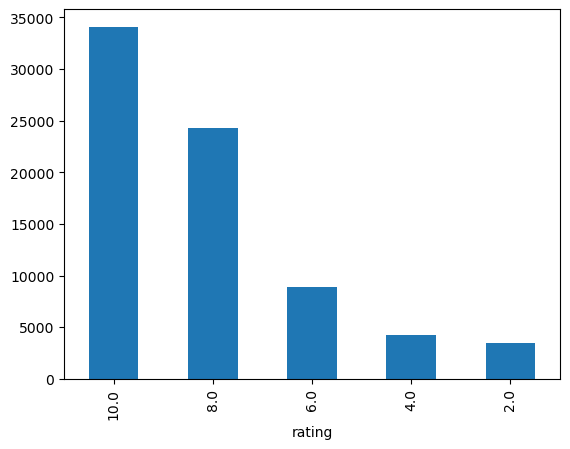

In [18]:
data['rating'].value_counts().plot(kind='bar')

In [19]:
data[data['rating'] == 10.0]

# 리뷰 점수가 만점 10.0 인 리뷰들

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,0,356,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,1,357,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,2,358,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,3,359,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,4,360,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True
...,...,...,...,...,...,...,...,...,...,...
74985,74985,223904,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 8월 31일,10.0,시설도 꺠끗하고 좋은 호텔입니다,True
74987,74987,223906,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 8월 24일,10.0,방음 잘 되고 이불이랑 베개가 너무 편했어요 조식은 비싸서 이용 안 했는데 숙소 아...,True
74991,74991,223910,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,1박 가족 여행,2019년 8월 17일,10.0,깨끗하고 직원분들 친절해서 좋았어요 한가지 아쉬운 점은 엘리베이터 이용이 너무 불편...,True
74994,74994,223913,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),other,1박 여행,2019년 6월 29일,10.0,혼자 갔는데 깨끗하고 다 좋았습니다,True


In [20]:
for i in list(data.loc[data['rating'] == 10, 'description'])[:15]:
    print(i)
    print()
    print()

직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비해 약간 부족합니다


웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두 인상적이었습니다


서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항에 친절히 빠르게 응대하여 좋았음직원이 친절하고 따뜻한 곳수영장은 사람들이 많았음


가격에 맞게 만족했습니다


처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 들었어요 시설도 그렇구요 불편하지 않게 추가로 커피서비스 및 젓가락도 친절히 가져다 주시고 너무 편안히 쉬다가 왔습니다


서비스 최고였어요수영장만 말고 사우나도 같이 이용할수있었으면 다만 토요일 오후에 집회 때문에 주변이 혼잡하더라구요


최고의 위치 좋은 서비스 관리 잘 된 시설 아주 만족


명동 가깝고 이그제큐티브룸 서비스도 좋고 깨끗하고 친절해요


위치도 좋았고 룸컨디션이 너무 좋았어요특히 조식부폐는 음식퀄리티가 굉장히 훌륭했어요


중심가라 새벽에도 차량소음이 들린다는 점 히터때문에 객실이 좀 건조한 편이라는 점을 제외하고는 모두 만족스러웠습니다


좋았습니다 위치가 너무 좋고 깨끗히고 친절했습니다


서울 도심과 매우 가까운 위치 직원들 정말 매우 매우 매우 친절 시설 좋음 밥 맛있음


크리스마스에 숙박했는데 조용하고 편안하게 잘 보내고 갑니다


침대가 매우 편안함주변동네가 좋음


호캉스로 최고였습니다 이그제큐티브20층 층을 이용할 수 있어서 티와 디저트 이용이 너무 편했습니다 또한 수영 사우나 조식도 무료라서 굉장히 만족했습니다




In [21]:
for i in list(data.loc[data['rating'] == 8, 'description'])[:15]:
    print(i)
    print()
    print()

주니어스위트로 더블싱글침대가 있어 모두 편히 잠을 잘 수있었습니다 바로 시청앞 스케이트장이 보여 뷰도 상당히 좋았고요 직원분들 격하게 친절하셔서 기분좋았네요 사우나가 완전 좋았어요


직원 친절하고 시설 좋았음


조선호텔은 처음 숙박하는데 듣던대로 직원분들의 서비스는 좋았습니다 연휴라 사람이 많아서 그런지 환구단뷰 요청에도 받지 못해서 다소 아쉬웠는데  끝방으로 주셔서 조용히 잘 묵었습니다 그리고 칵테일아워 음식이 조식보다 못해서 좀 아쉬운점 정도 있습니다


인테리어는 오래된 호텔이라 특별히 좋거나 세련되지는 않았지만 스위트룸 객실이 다른 호텔의 스위트보다  조금 넓은 것 같아서 편안했습니다 주변에 롯데백화점도 있고 상권이 발달하여 위치적으로도 편리했어요


따뜻한 느낌의 서비스


침구관리 잘 되어있어 좋았구요 평판만큼 조식은 그저그랬어요광장 집회로 호텔진입로가 막히면 프론트 직원들이 상황을 잘 전달받아 우회도로 안내정도는 좀 해주실 수 있으면 좋겠네요


위치가 좋네요 조식도 훌륭한 편입니다


전체적으로 좋은컨디션이였음


시설도 깨끗하고 좋았습니다 특히 사정이 있어 저녁시간에 와인을 마시러 못갔었는데 들어와보니 와인과 과일이 있어서 놀랐습니다 사소한것 하나하나 신경써주셔서 감사합니다


서울시청역이랑 가깝고 같은 한국인으로써 자부심느낄정도로 직원분들이 정말정말 친절하고 세심하세요 시설 안내해주시는것도 꼼꼼히 챙겨주시고 너무 좋은 여름 휴가 보냈습니다 아쉬운점이 있다면 화장실 문이 고장났는데 안잠겨서 당황했고 옷장안에 그을림 자국같은 것이 있어서 청소가 조금 덜되지 않았나 싶습니다그래도 너무너무 좋았어요  다음에 또 묵고 싶어요


숙박은 좋았으나 사우나 비용이 너무 비싼 것 같습니다


위치를 비롯해서 대부분 만족해요


편하게 잘 쉬다가 왔습니다


공기가 탁했어요 방에서도 조식시간이나 저녁시간에 음식 냄새가 들어오기도하고 먼가 공기가 쾌쾌한 것 같았어요 나머지는 서비스는 너무너무 괜찮았습니다


청소를 좀 깔끔히 해주셨으면 합니다




In [22]:
for i in list(data.loc[data['rating'] == 2, 'description'])[30:60]:
    print(i)
    print()
    print()

King size bed가 두개의 싱글 베드로 붙혀 놓았음 특급 호텔로 평가 불가함   옆방의 소리가 그대로 전달   발음 안됨   이해가 안됨 어찌 툭급 호텔인지 room 이 이런데


테라스가 잇다고 가격을 올려받으면서 이더운 여름날에 테라스에 선풍기 하나없이 만들어져잇고 왜 만들엇는지 이해가 안감그리고 예약할때 분명 호텔에서 결제하기로 햇는데중간에 카드결제 막되고 익스피디아믿고 카드번호 적어줫는데 이래도 되나싶어요그리고 호텔에서도 체크인할때 호텔이랑 익스피디아랑 뭔 문제 때문이라면서 취소하고 다시 전액결제하고 다음날 체크아웃할때 또 카드취소하고 다시 결제하고 그러면서 시간걸리고 체크인할때도 예약하지 않는 방주고 그것도 자기들실수면서 사람들 앞에서 내가 클래임걸어서 방바꿔준거처럼 이야기 햇어 제가 화가 나서 당신들이 잘못해놓고 왜 말을 그런식으로 하냐고 항의하니까 그제서야 미안하다는 사과와 싸구러 와인한병과 마카롱으로 대충때우는 이런호텔은 두번다시 가고싶지도 추천하고싶지도 않고 익스피디아에서도 예약 다시는 안하고 싶네요


이곳에서 숙박시 가습기와 공기청정기는 필수입니다너무 건조하고 객실 공기가 좋지 못하여 저희 가족은 알러지 증상들을 겪고 퇴실합니다수건을 왕창 널어놔도 제대로 가습도 안되고 놀러왔다가 병을 얻고 돌아가네요


별로 옆에 인터컨티넨털이 100배 나음 조식 완전 쓰레기


직원들은 친절하지만 숙박시설은 최악이었습니다 두 번 다시 안가고 싶네요


규정이 있다지만 체크인을 안해도 문자하나 해주질 않네요돈 받았으니 손해날게 없어 그렇겠지만


CheckIn 할때 프론트 데스크 여직원 불친절하고 일 처리도 매우 늦음 방도 깨끗하지 못하고 가격대비 절대 권하지 싶지 않은 호텔임


출장 겸 숙박했습니다노후된 시설에 불친절한 직원까지 너무 별로였네요특히 화장실에 세면대쪽 바닥이 물이 빠지지 않아 화장실 들어가는 내내 발이 젖어 엄청 불편했네요


주차안내도 엉망이고  곰팡이 냄새에  5성급이 무색할정도입니다


끔찍한 경험 온 방안은 더러운 카팻의 먼

In [23]:
len(data[data['rating'] == 10.0])

34103

In [24]:
data['tripType'].value_counts()

tripType
family          28680
other           16859
business        11487
romance         10731
with-friends     7243
Name: count, dtype: int64

In [25]:
data['tripTypeText'].value_counts()

tripTypeText
1박 가족 여행      21862
1박 여행         13515
1박 로맨틱 여행      8582
1박 출장          7944
친구와 1박 여행      6065
              ...  
12박 로맨틱 여행        1
16박 출장            1
26박 가족 여행         1
20박 출장            1
14박 로맨틱 여행        1
Name: count, Length: 95, dtype: int64

In [26]:
data['isKorNot'].value_counts()

isKorNot
True    75000
Name: count, dtype: int64

## 상투적인 언어 제거하기 
* nltk 라이브러리로 상투적인 언어(stopwords) 제거하기

In [27]:
from nltk.corpus import stopwords

In [28]:
data['description']

0        직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1        웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2        서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3                                            가격에 맞게 만족했습니다
4        처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
                               ...                        
74995    조식과 스탠더드 하프전망 신청해서  1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...
74996    객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...
74997    배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...
74998    우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...
74999    주차장이 부족해서 다른데에 주차했는데 아침에 이동해달라는 전화가 와서 다소 불쾌했슴...
Name: description, Length: 75000, dtype: object

In [29]:
data['description'][:2]

0    직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1    웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
Name: description, dtype: object

In [30]:
stopwords

<WordListCorpusReader in '/home/user/nltk_data/corpora/stopwords'>

In [31]:
def remove_stopwords(x):
    cleaned = []
    for i in x.split():
        if i not in stopwords:
            cleaned.append(i)
    cleaned = " ".join(cleaned)
    
    return cleaned

In [32]:
from nltk.corpus import stopwords

In [33]:
# data['description'].apply(remove_stopwords)

In [34]:
stopwords_list = set(stopwords.words('english'))

In [35]:
def remove_stopwords(x):
    cleaned = []
    for i in x.split():
        if i.lower() not in stopwords_list:  # stopwords_list로 변경
            cleaned.append(i)
    return " ".join(cleaned)

In [36]:
data['description'] = data['description'].apply(remove_stopwords)

## 자주 등장하는 단어 빈도 분석 

In [37]:
whole_words = []
for words in data['description']:
    for word in words.split():
        whole_words.append(word)

In [38]:
len(whole_words)

1415899

In [39]:
stopwords_list = stopwords.words('english')  # 리스트로 변환

In [40]:
stopwords_list.extend(['깔끔', '서비스'])  # 새로운 단어 추가

In [41]:
# NLTK의 영어 불용어 리스트를 가져와서 세트로 변환 (세트로 하면 검색 속도가 더 빠름)
stopwords_list = set(stopwords.words('english'))

In [42]:
result = []
for i in whole_words:
    if i not in stopwords_list:  # stopwords_list로 변경
        result.append(i)

In [43]:
print(result)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [44]:
from nltk.probability import FreqDist
import koreanize_matplotlib

In [45]:
FreqDist(result)

FreqDist({'너무': 13918, '잘': 8725, '좋았습니다': 8114, '좀': 7608, '깨끗하고': 7594, '있어서': 5728, '수': 5698, '매우': 5617, '좋았어요': 5335, '호텔': 5193, ...})

<Axes: xlabel='Samples', ylabel='Counts'>

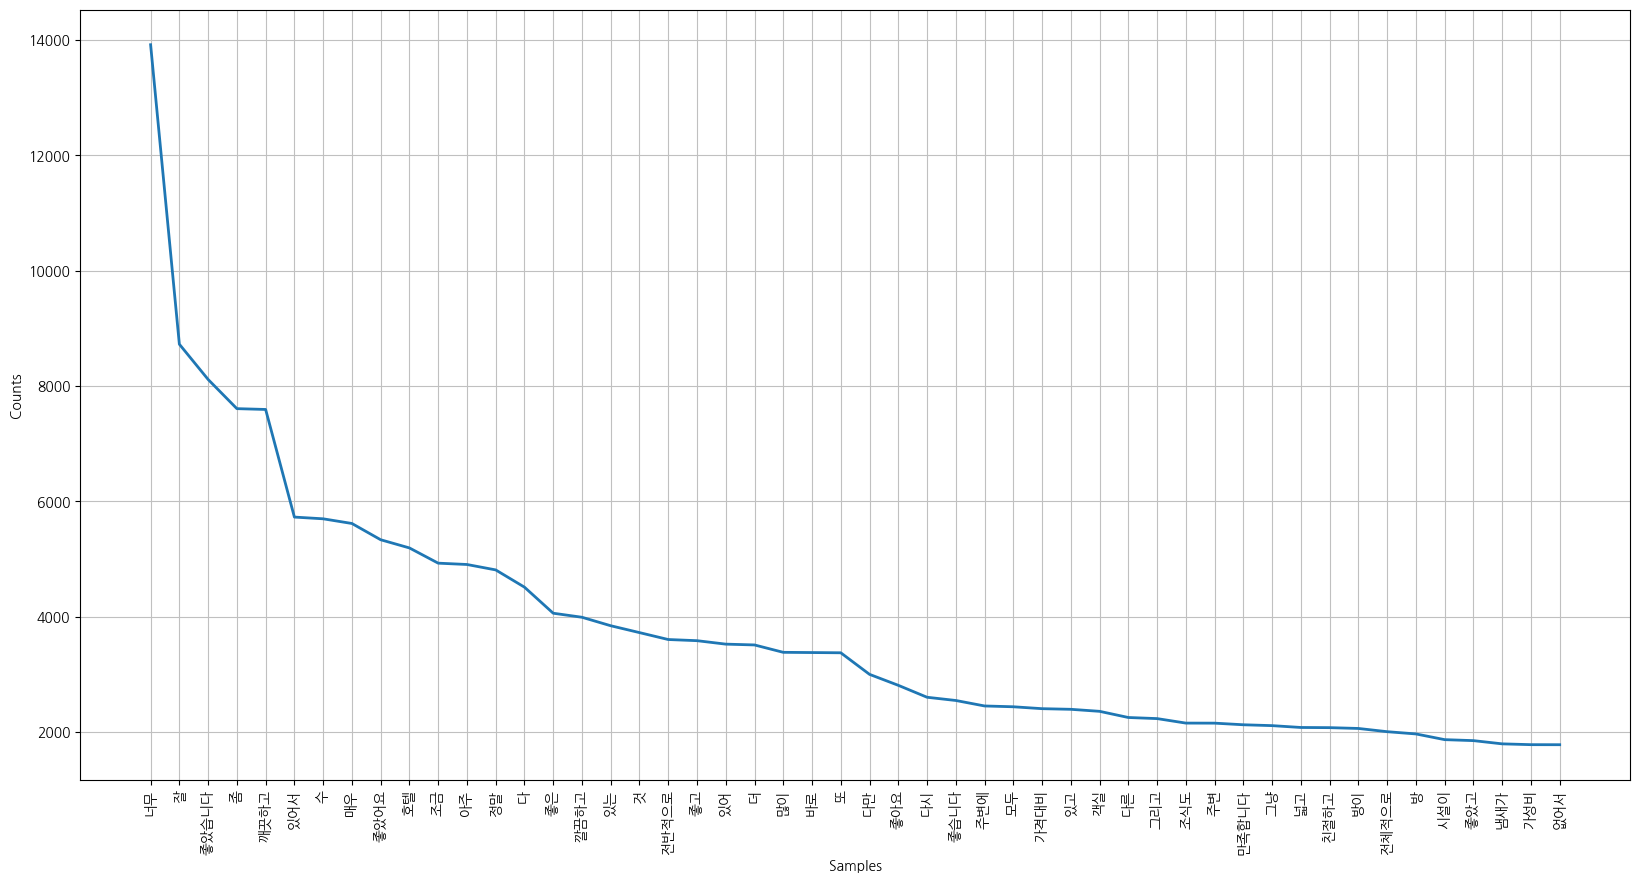

In [46]:
plt.figure(figsize=(20,10))
FreqDist(result).plot(50)

In [47]:
result2 = " ".join(result)
print(len(result2))

6382260


## Word Cloud 만들기

In [48]:
from wordcloud import WordCloud

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [50]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 폰트 경로를 시스템에 맞게 변경

In [51]:
wc = WordCloud(font_path=font_path, background_color="white").generate(result2)


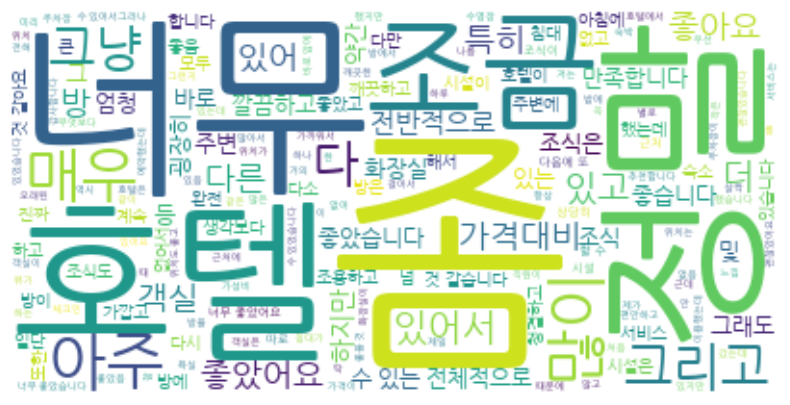

In [52]:
# 그림 그리기
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## rating 리뷰 별 Word Cloud 만들기

In [53]:
data['rating'].value_counts()

rating
10.0    34103
8.0     24283
6.0      8877
4.0      4278
2.0      3459
Name: count, dtype: int64

In [54]:
X = data[['description']]
y = data['rating']

In [55]:
X

,description
0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3,가격에 맞게 만족했습니다
4,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
...,...
74995,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가고...
74996,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...
74997,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...
74998,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...


In [56]:
y

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
74995    10.0
74996     8.0
74997     8.0
74998     8.0
74999     6.0
Name: rating, Length: 75000, dtype: float64

In [57]:
data2 = pd.concat([X, y], axis=1)
data2

,description,rating
0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,10.0
1,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,10.0
2,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,10.0
3,가격에 맞게 만족했습니다,10.0
4,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,10.0
...,...,...
74995,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가고...,10.0
74996,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...,8.0
74997,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...,8.0
74998,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...,8.0


In [58]:
good = data2.loc[data2['rating'] == 10, 'description'] 
good.head()

0    직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1    웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2    서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3                                        가격에 맞게 만족했습니다
4    처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
Name: description, dtype: object

In [59]:
soso = data2.loc[data2['rating'] == 8, 'description'] 
soso.head()

13    주니어스위트로 더블싱글침대가 있어 모두 편히 잠을 잘 수있었습니다 바로 시청앞 스케...
18                                       직원 친절하고 시설 좋았음
21    조선호텔은 처음 숙박하는데 듣던대로 직원분들의 서비스는 좋았습니다 연휴라 사람이 많...
33    인테리어는 오래된 호텔이라 특별히 좋거나 세련되지는 않았지만 스위트룸 객실이 다른 ...
37                                          따뜻한 느낌의 서비스
Name: description, dtype: object

In [60]:
bad = data2.loc[data2['rating'] == 2, 'description'] 
bad.head()

41     보통 이뷰 남기지 않는데 처음으로 남겨봅니다 국내외 특급호텔 많이 다녀봤는데 이 곳...
43     고객을 편안히개 만드는 법을 잘 아는 호텔입니다 오랜 역사가 과연 명불허전 종업원 ...
82     체크인 한시간 걸렸고 둘째날 오전에 나가면서 청소 좀 부탁하고 오후 세시에 들어왔는...
166    체크인 할때는 친절히 잘해주셨는데 방에 들어가자마자 침대에 긴 머리카락 발견하고 로...
168    예약자 및 카드결제자는 본인명의로 하였고 신분증 과 본인명의 크레딧카드를 제시하였다...
Name: description, dtype: object

In [61]:

good_text = " ".join(list(good))
len(good_text)

2465115

In [62]:
soso_text = " ".join(list(soso))
len(soso_text)

2005104

In [63]:
bad_text = " ".join(list(bad))
len(bad_text)

501942

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [65]:
# 한글 폰트 경로 설정 (예: 나눔고딕 폰트 사용)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # Linux 시스템에 나눔고딕 폰트 경로
# Windows의 경우: 'C:/Windows/Fonts/malgun.ttf' (맑은 고딕 폰트)


In [66]:
# WordCloud에 폰트 경로를 지정하고 워드클라우드 생성
wc1 = WordCloud(font_path=font_path, stopwords=['아주', '편안', '깔끔', '서비스'], 
               max_words=2000, random_state=200, background_color="white").generate(good_text)

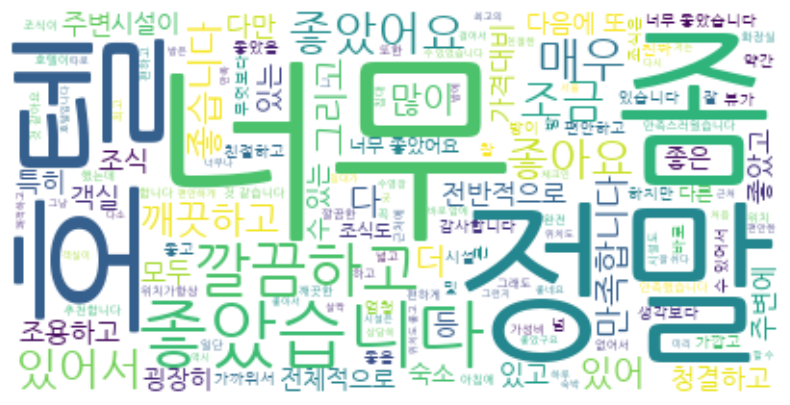

In [67]:
plt.figure(figsize=(10, 5))
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

In [68]:
# WordCloud에 폰트 경로를 지정하고 워드클라우드 생성
wc2 = WordCloud(font_path=font_path, stopwords=['그냥', '별로', '청소', '서비스', '가격'], 
               max_words=2000, random_state=200, background_color="white").generate(soso_text)

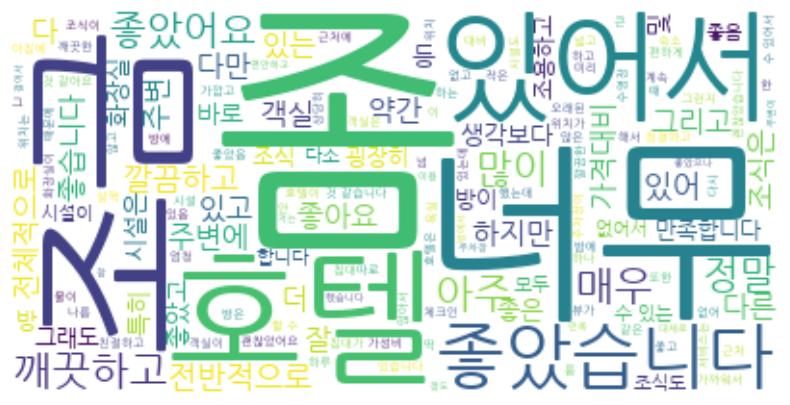

In [69]:
plt.figure(figsize=(10, 5))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

In [70]:
# WordCloud에 폰트 경로를 지정하고 워드클라우드 생성
wc3 = WordCloud(font_path=font_path, stopwords=['별로', '청소', '청결', '룸'], 
               max_words=2000, random_state=200, background_color="white").generate(bad_text)

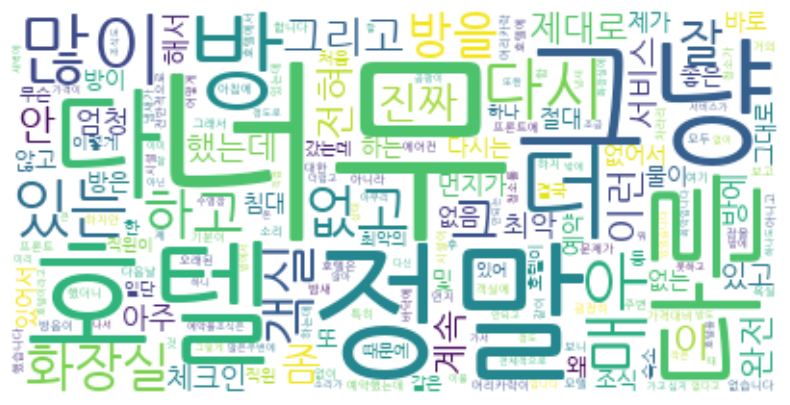

In [71]:
plt.figure(figsize=(10, 5))
plt.imshow(wc3, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

## 나이브베이즈분류 모델을 통해 리뷰의 별점 예측하기
나이브베이즈를 이용해서 감성분석하기

In [72]:
data

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,0,356,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,1,357,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,2,358,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,3,359,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,4,360,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True
...,...,...,...,...,...,...,...,...,...,...
74995,74995,223914,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 8월 17일,10.0,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가고...,True
74996,74996,223915,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,2박 로맨틱 여행,2018년 11월 30일,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...,True
74997,74997,223916,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,1박 가족 여행,2019년 12월 4일,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...,True
74998,74998,223917,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),other,1박 여행,2019년 5월 2일,8.0,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...,True


In [73]:
X = data[['description']]
y = data['rating']

In [74]:
X

,description
0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3,가격에 맞게 만족했습니다
4,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
...,...
74995,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가고...
74996,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...
74997,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...
74998,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...


In [75]:
y

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
74995    10.0
74996     8.0
74997     8.0
74998     8.0
74999     6.0
Name: rating, Length: 75000, dtype: float64

In [76]:
X['description']

0        직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1        웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2        서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3                                            가격에 맞게 만족했습니다
4        처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
                               ...                        
74995    조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가고...
74996    객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...
74997    배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...
74998    우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...
74999    주차장이 부족해서 다른데에 주차했는데 아침에 이동해달라는 전화가 와서 다소 불쾌했슴...
Name: description, Length: 75000, dtype: object

In [77]:
from konlpy.tag import Mecab
mecab = Mecab()

In [78]:
def tokenizer(x):
    token = mecab.morphs(x)
    return token

In [79]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [81]:
from nltk.corpus import stopwords

In [82]:
stopwords_list = stopwords.words('english')

In [86]:
cv = CountVectorizer(tokenizer=tokenizer, max_df=0.95, min_df=0.001, ngram_range=(1, 3), stop_words=stopwords_list)
X_cv = cv.fit_transform(X)


ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

In [80]:
cv = CountVectorizer(tokenizer=tokenizer, max_df=0.8, min_df=4, ngram_range=(1,3), stop_words=stopwords )
X_cv = cv.fit_transform(X)

InvalidParameterError: The 'stop_words' parameter of CountVectorizer must be a str among {'english'}, an instance of 'list' or None. Got <WordListCorpusReader in '/home/user/nltk_data/corpora/stopwords'> instead.

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

In [88]:
X_train, X_valid, y_train, y_valid = train_test_split(X_cv, y, test_size=0.4, random_state=7)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=7)

NameError: name 'X_cv' is not defined

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred = mnb.predict(X_valid)
print(classification_report(y_valid, pred))
test_pred = mnb.predict(X_test)
print("="*40, "test result", "="*40)
print(classification_report(y_test, test_pred))

## TfidfVectorizer

In [ ]:
tfidf_cv = TfidfVectorizer(tokenizer=tokenizer, max_df=0.8, min_df=4, ngram_range=(1,3), stop_words=stopwords )
X_tfidf = tfidf_cv.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_tfidf, y, test_size=0.4, random_state=7)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=7)

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred = mnb.predict(X_valid)
print(classification_report(y_valid, pred))
test_pred = mnb.predict(X_test)
print("="*40, "test result", "="*40)
print(classification_report(y_test, test_pred))

## SMOTE 로 데이터 증폭 후 분석


* SMOTE : Synthetic Minority Over-sampling Technique 
- 불균형 데이터를 다룰 때 자주 사용되는 오버샘플링 기법
- 소수 클래스의 데이터를 단순히 복제하는 방식이 아니라, 기존 데이터를 기반으로 새로운 데이터를 합성하여 데이터의 다양성을 증가시킴. 

In [ ]:
# !pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

In [ ]:
smt = SMOTE(random_state=7)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

In [ ]:
y_train_smt.value_counts()

In [ ]:
X_train_smt

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train_smt, y_train_smt)
pred = mnb.predict(X_valid)
print(classification_report(y_valid, pred))
test_pred = mnb.predict(X_test)
print("="*40, "test result", "="*40)
print(classification_report(y_test, test_pred))